# Generating list of immune related signatures
Author: Petra Schwale

In [ ]:
import besca as bc
import numpy as np
import pandas as pd
import scanpy as sc
import matplotlib.pyplot as plt
from scipy import sparse, io
import os
import time
import logging
import seaborn as sns
sc.logging.print_versions()

# for standard processing, set verbosity to minimum
sc.settings.verbosity = 0  # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.settings.set_figure_params(dpi=80)
version = '2.8'
start0 = time.time()

In [2]:
#define standardized filepaths based on above input
root_path = os.getcwd()
bescapath_full = os.path.dirname(bc.__file__)
bescapath = os.path.split(bescapath_full)[0]

In [3]:
### Uncomment this when running after the sworflow
analysis_name = 'immunegenes'
results_folder = os.path.join(root_path, '..', 'data')
figdir=os.path.join(root_path, 'analyzed', analysis_name+'/figures/')
sc.settings.figdir = figdir
clusters='leiden'

In [4]:
lee = bc.datasets.Lee2020_processed() #alternative:
lee


AnnData object with n_obs × n_vars = 61370 × 2192
    obs: 'CELL', 'CONDITION', 'Patient', 'Tissue', 'Sample', 'Cell_type', 'Cell_subtype', 'percent_mito', 'n_counts', 'n_genes', 'leiden', 'celltype0', 'celltype1', 'celltype2', 'celltype3', 'dblabel'
    var: 'ENSEMBL', 'SYMBOL', 'n_cells', 'total_counts', 'frac_reads'
    uns: 'celltype0_colors', 'celltype1_colors', 'celltype2_colors', 'celltype3_colors', 'leiden', 'neighbors', 'pca', 'rank_genes_groups', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

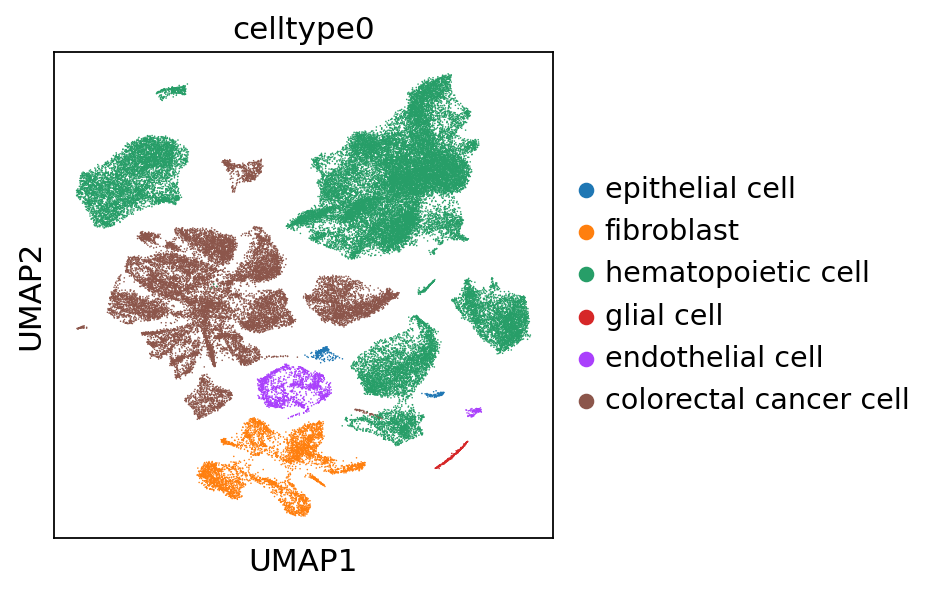

In [5]:
sc.pl.umap(lee,color='celltype0')

In [6]:
delist={}
for i in list(set(lee[lee.obs['celltype0'].isin(['hematopoietic cell'])].obs['dblabel'])):
    pickcells=list(set(lee[lee.obs['celltype0']!='hematopoietic cell'].obs['dblabel']).union(set([i])))
    subdata=lee[lee.obs['dblabel'].isin(pickcells)].copy()
    delist[i]=bc.tl.dge.get_de(subdata,'dblabel',demethod='wilcoxon',topnr=5000, logfc=np.log2(1.5),padj=0.05)[i]

In [7]:
myg=set()
for i in delist.keys():
    myg=myg.union(set(delist[i]['Name']))

In [8]:
#len(myg)

In [9]:
peng = bc.datasets.Peng2019_processed() #alternative:
peng

AnnData object with n_obs × n_vars = 57423 × 2033
    obs: 'CELL', 'CONDITION', 'Patient', 'Type', 'Cell_type', 'percent_mito', 'n_counts', 'n_genes', 'leiden', 'celltype0', 'celltype1', 'celltype2', 'celltype3', 'dblabel'
    var: 'ENSEMBL', 'SYMBOL', 'n_cells', 'total_counts', 'frac_reads'
    uns: 'CONDITION_colors', 'Cell_type_colors', 'Patient_colors', 'celltype0_colors', 'celltype1_colors', 'celltype2_colors', 'celltype3_colors', 'leiden', 'leiden_colors', 'neighbors', 'pca', 'rank_genes_groups'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

In [10]:
delistp={}
for i in list(set(peng[peng.obs['celltype0'].isin(['hematopoietic cell'])].obs['dblabel'])):
    pickcells=list(set(peng[peng.obs['celltype0']!='hematopoietic cell'].obs['dblabel']).union(set([i])))
    subdata=peng[peng.obs['dblabel'].isin(pickcells)].copy()
    delistp[i]=bc.tl.dge.get_de(subdata,'dblabel',demethod='wilcoxon',topnr=5000, logfc=np.log2(1.5),padj=0.05)[i]

In [11]:
mygp=set()
for i in delistp.keys():
    mygp=mygp.union(set(delistp[i]['Name']))

In [12]:
len(mygp)

4289

In [13]:
### Some immune-specific genes to test
goi=['CXCL9','GZMB','CCL5','CD8A','CD8B','CCR7','PTPRC','XCL1','CLEC9A','XCR1','CD14','CD19','CCL22']

In [14]:
(mygp.intersection(myg)).intersection(set(goi))

{'CCL22',
 'CCL5',
 'CCR7',
 'CD14',
 'CD19',
 'CD8A',
 'CD8B',
 'CLEC9A',
 'CXCL9',
 'GZMB',
 'PTPRC',
 'XCL1'}

In [15]:
(mygp.union(myg)).intersection(set(goi))

{'CCL22',
 'CCL5',
 'CCR7',
 'CD14',
 'CD19',
 'CD8A',
 'CD8B',
 'CLEC9A',
 'CXCL9',
 'GZMB',
 'PTPRC',
 'XCL1'}

In [16]:
smil=bc.datasets.Smillie2019_processed()
smil

AnnData object with n_obs × n_vars = 149732 × 2196
    obs: 'CELL', 'Cluster', 'Health', 'Location', 'Subject', 'celltype_highlevel', 'nGene', 'nUMI', 'original_name', 'percent_mito', 'n_counts', 'n_genes', 'batch', 'leiden', 'dblabel', 'celltype', 'cluster_celltype', 'Type'
    var: 'ENSEMBL', 'SYMBOL', 'n_cells', 'total_counts', 'frac_reads'
    uns: 'Cluster_colors', 'Location_colors', 'Type_colors', 'celltype_highlevel_colors', 'leiden', 'leiden_colors', 'neighbors', 'pca', 'rank_genes_groups', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

In [17]:
set(smil.obs['celltype_highlevel'])

{'Epi', 'Fib', 'Imm'}

In [18]:
delists={}
for i in list(set(smil[smil.obs['celltype_highlevel'].isin(['Imm'])].obs['dblabel'])):
    pickcells=list(set(smil[smil.obs['celltype_highlevel']!='Imm'].obs['dblabel']).union(set([i])))
    subdata=smil[smil.obs['dblabel'].isin(pickcells)].copy()
    delists[i]=bc.tl.dge.get_de(subdata,'dblabel',demethod='wilcoxon',topnr=5000, logfc=np.log2(1.5),padj=0.05)[i]

In [19]:
mygs=set()
for i in delists.keys():
    mygs=mygs.union(set(delists[i]['Name']))

In [20]:
(mygp.intersection(myg).intersection(mygs)).intersection(set(goi))

{'CCL22',
 'CCL5',
 'CCR7',
 'CD14',
 'CD19',
 'CD8A',
 'CD8B',
 'CLEC9A',
 'CXCL9',
 'GZMB',
 'PTPRC',
 'XCL1'}

In [21]:
(mygp.union(myg).union(mygs)).intersection(set(goi))

{'CCL22',
 'CCL5',
 'CCR7',
 'CD14',
 'CD19',
 'CD8A',
 'CD8B',
 'CLEC9A',
 'CXCL9',
 'GZMB',
 'PTPRC',
 'XCL1',
 'XCR1'}

#### final list - needs to be present in 2 out of 3 datasets

In [22]:
ab=mygp.intersection(myg)
bc=mygp.intersection(mygs)
ac=mygs.intersection(myg)
finalg=ab.union(bc).union(ac)
finalg.intersection(set(goi))

{'CCL22',
 'CCL5',
 'CCR7',
 'CD14',
 'CD19',
 'CD8A',
 'CD8B',
 'CLEC9A',
 'CXCL9',
 'GZMB',
 'PTPRC',
 'XCL1'}

In [28]:
goi

['CXCL9',
 'GZMB',
 'CCL5',
 'CD8A',
 'CD8B',
 'CCR7',
 'PTPRC',
 'XCL1',
 'CLEC9A',
 'XCR1',
 'CD14',
 'CD19',
 'CCL22']

In [24]:
len(finalg)

4233

In [25]:
len(myg)

3151

In [26]:
len(mygs)

6037

In [27]:
len(mygp)

4289

#### Export 

In [32]:
pd.Series(list(finalg)).to_csv(results_folder+'/ImmuneGenes.tsv', sep='\t', index=False,header=False)